In [1]:
from torch import nn, optim
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader

In [2]:
torch.manual_seed(1)

In [14]:
def plot_2d_plane(model, dataset, n = 0):
    w1 = model.state_dict()['linear.weight'].numpy()[0][0]
    w2 = model.state_dict()['linear.weight'].numpy()[0][1]
    b = model.state_dict()['linear.bias'].numpy()
    x1 = data_set.x[:, 0].view(-1, 1).numpy()
    x2 = data_set.x[:, 1].view(-1, 1).numpy()
    y = data_set.y.numpy()
    X, Y = np.meshgrid(np.arange(x1.min(), x1.max(), 0.05), np.arange(x2.min(), x2.max(), 0.05))
    y_hat = w1 * X + w2 * Y + b
    fig = plt.figure()
    ax = fig.gca(projection = '3d')
    ax.plot(x1[:, 0], x2[:, 0], y[:, 0], 'ro', label = 'y')
    ax.plot_surface(X, Y, y_hat)
    ax.set_xlabel('x1 ')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    plt.title('estimated plane iteration:' + str(n))
    ax.legend()
    plt.show()

In [4]:
# Create a 2D dataset

class Data2D(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.zeros(20, 2)
        self.x[:, 0] = torch.arange(-1, 1, 0.1)
        self.x[:, 1] = torch.arange(-1, 1, 0.1)
        self.w = torch.tensor([[1.0], [1.0]])
        self.b = 1
        self.f = torch.mm(self.x, self.w) + self.b    
        self.y = self.f + 0.1 * torch.randn((self.x.shape[0],1))
        self.len = self.x.shape[0]

    # Getter
    def __getitem__(self, index):          
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

In [5]:
data_set = Data2D()

In [8]:
class linear_regression(nn.Module):
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        y_hat = self.linear(x)
        return y_hat

In [9]:
model = linear_regression(2, 1)
list(model.parameters())

[Parameter containing:
 tensor([[ 0.6209, -0.1178]], requires_grad=True),
 Parameter containing:
 tensor([0.3026], requires_grad=True)]

In [10]:
optimizer = optim.SGD(model.parameters(), lr = 0.1)

In [11]:
criterion = nn.MSELoss()

In [12]:
train_loader = DataLoader(dataset = data_set, batch_size = 2)

Before training: 


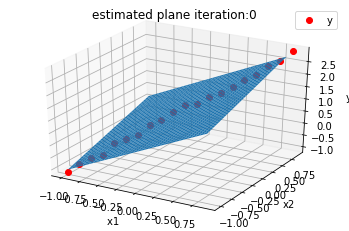

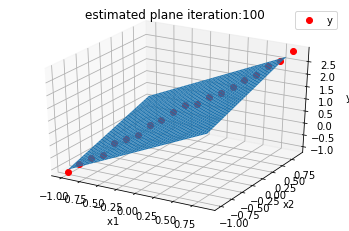

In [18]:
losses = []
print('Before training: ')
plot_2d_plane(model, data_set)
epochs = 100

def train_model(epochs):
    for epoch in range(epochs):
        for x, y in train_loader:
            y_hat = model(x)
            loss = criterion(y_hat, y)
            losses.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
train_model(epochs)
plot_2d_plane(model, data_set, epochs)

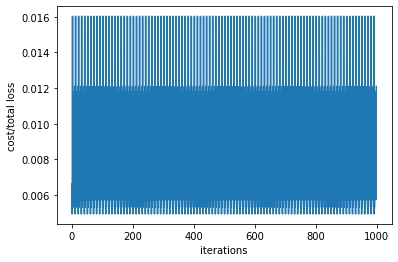

In [20]:
plt.plot(losses)
plt.xlabel('iterations')
plt.ylabel('cost/total loss')
plt.show()

In [22]:
dataset = Data2D()

train_loader = DataLoader(dataset = dataset, batch_size = 30)
model1 = linear_regression(2, 1)
optimizer = optim.SGD(model1.parameters(), lr = 0.1)
losses = []
epochs = 100
def train_model(epochs):
    for epoch in range(epochs):
        for x, y in train_loader:
            y_hat = model1(x)
            loss = criterion(y_hat, y)
            losses.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
train_model(epochs)
plot_2d_plane(model1, dataset)
plt.plot(losses)
plt.xlabel()

torch.manual_seed(2)

In [23]:
validation_data = Data2D()
Y = validation_data.y
X = validation_data.x